In [124]:
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
df= pd.read_csv("E:\Data sets\income.csv")

In [126]:
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [127]:
df.shape

(22, 3)

In [128]:
df.isnull().sum()

Name      0
Age       0
Income    0
dtype: int64

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22 non-null     object
 1   Age     22 non-null     int64 
 2   Income  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [130]:
# name column is not that important 
df.drop('Name',axis=1,inplace=True)

In [131]:
df.head()

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


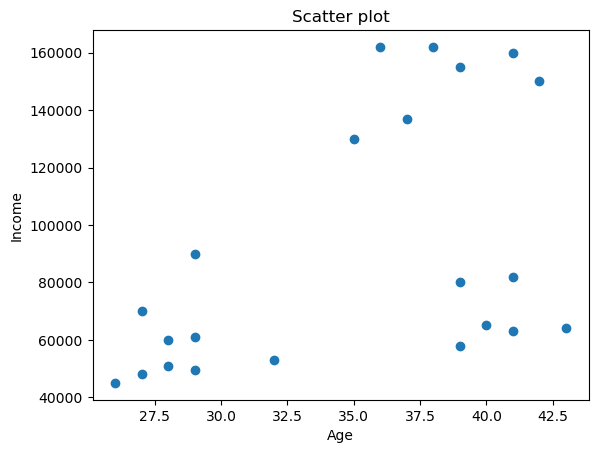

In [132]:
plt.scatter(df['Age'],df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter plot')
plt.show()

In [133]:
from sklearn.preprocessing import MinMaxScaler

In [134]:
scaler= MinMaxScaler()

In [135]:
df['Age']= scaler.fit_transform(df[['Age']])

In [136]:
df['Income']= scaler.fit_transform(df[['Income']])

In [137]:
#apply kmeans
from sklearn.cluster import KMeans

In [138]:
model= KMeans(n_clusters=3)

In [139]:
model.fit(df[['Age','Income']])

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [140]:
df['cluster']= model.predict(df[['Age','Income']])


In [141]:
df.head()

,Age,Income,cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


In [142]:
df0= df[df['cluster']==0]

In [143]:
df0

,Age,Income,cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
11,0.000000,0.000000,0
12,0.058824,0.025641,0
13,0.117647,0.051282,0
14,0.176471,0.038462,0
15,0.352941,0.068376,0


In [144]:
df1=df[df['cluster']==1]
df2=df[df['cluster']==2]

In [145]:
df1

,Age,Income,cluster
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,1.000000,1
9,0.529412,0.726496,1
10,0.647059,0.786325,1


In [146]:
df2

,Age,Income,cluster
16,0.823529,0.170940,2
17,0.882353,0.153846,2
18,1.000000,0.162393,2
19,0.764706,0.299145,2
20,0.882353,0.316239,2
21,0.764706,0.111111,2


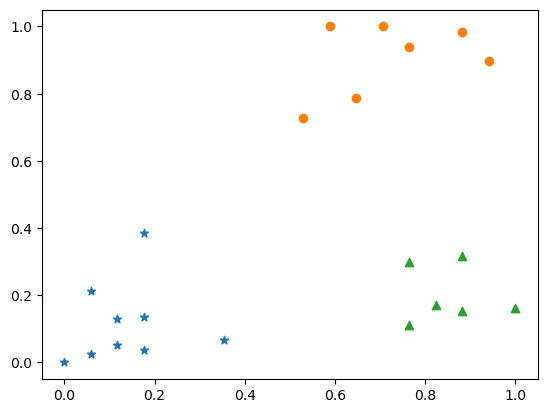

In [147]:
plt.scatter(df0['Age'],df0['Income'],marker='*')
plt.scatter(df1['Age'],df1['Income'])
plt.scatter(df2['Age'],df2['Income'],marker='^')
plt.show()

In [148]:
 model.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.9047619 ],
       [0.85294118, 0.2022792 ]])

In [149]:
model.cluster_centers_[:,0]

array([0.1372549 , 0.72268908, 0.85294118])

In [150]:
model.cluster_centers_[:,1]

array([0.11633428, 0.9047619 , 0.2022792 ])

In [151]:
model.inertia_

0.48259220352300936

In [156]:
# to check which value for n_clusters would be better
final=[]
for i in range(1,11):
    model= KMeans(n_clusters=i)
    model.fit(df[['Age','Income']])
    final.append(model.inertia_)
    
    

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

In [157]:
final

[5.493999956592008,
 2.1317304647961124,
 0.48259220352300936,
 0.36400718588289455,
 0.28130548890777957,
 0.22472555029282476,
 0.16887732778070813,
 0.1357503708448612,
 0.10412973128644618,
 0.07860452722081386]

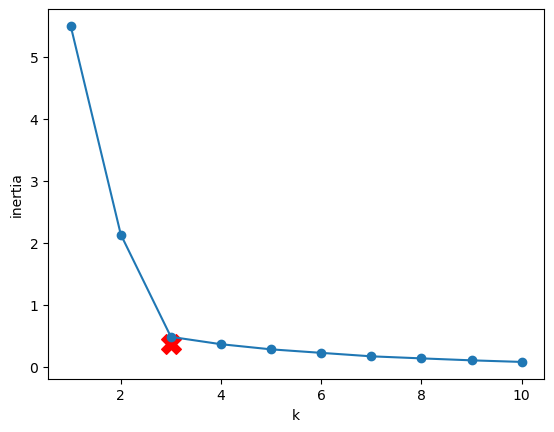

In [162]:
plt.plot(range(1,11),final, marker='o')

#it is also the elbow method
# 3 is the no. at which we want a marker,s=size of marker,c=color of marker
plt.scatter(3,final[3],marker='X',s=200,c='r')
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
